- **Importing keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

- **Importing models and layers from keras**
- **Importing mnist dataset**
- **Importing python utilities - numpy**


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

- **Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


- **Printing a image from the training dataset**

(60000, 28, 28)


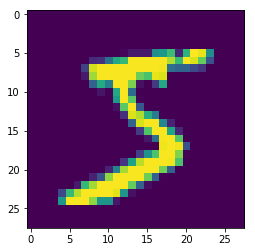

In [175]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

- **Reshaping the images as 28x28 matrix**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- **Normalizing both the training and test images
such that each value in the image will be b/w 0.0 and 1.0**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- **Listing the labels (from 0 to 9) for first 10 images**

In [178]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- **Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- **This is how the 10 Dimentional class matrix looks like
 The position of "1." at each row is basically the label
 of the image.**

In [180]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

- **Creating Model (~ 20000 parameters)**

In [181]:
from keras.layers import Activation
model = Sequential()
                                                                                
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(Convolution2D(16, 1, 1, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))                                       

model.add(Convolution2D(32, 3, 3, activation='relu'))                           

model.add(Convolution2D(16, 1, 1, activation='relu'))                           
model.add(MaxPooling2D(pool_size=(2, 2)))                                           

model.add(Convolution2D(16, 3, 3, activation='relu'))                               
model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/pyth

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 10, 10, 16)        528       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 16)          0         
__________

- **Using stochastic gradient descent**

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])


- **Training the model with batch size of 32 images and epoch = 30**

In [184]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 10s 161us/step - loss: 0.8447 - acc: 0.7159
Epoch 2/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.1881 - acc: 0.9424
Epoch 3/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.1271 - acc: 0.9615
Epoch 4/30
60000/60000 [==============================] - 9s 156us/step - loss: 0.1006 - acc: 0.9691
Epoch 5/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.0843 - acc: 0.9743
Epoch 6/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.0750 - acc: 0.9770
Epoch 7/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.0675 - acc: 0.9791
Epoch 8/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.0625 - acc: 0.9808
Epoch 9/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.0581 - acc: 0.9820
Epoch 10/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.0553 -

- **Showing the average loss and accuracy on test data set. After testing the
Accuracy of the model on test set is 98.8%**

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [186]:
print(score)

[0.03709949178028619, 0.9881]


- **Getting the prediction on first 9 images of test set from the trained model**

In [0]:
y_pred = model.predict(X_test)

In [188]:
print(y_pred[:9])
print(y_test[:9])

[[1.8064804e-09 1.6800200e-09 1.3420258e-07 5.1039137e-06 1.3042144e-10
  1.3239326e-09 2.3948790e-12 9.9999058e-01 1.0597160e-07 4.0756613e-06]
 [5.5236655e-09 9.5207203e-11 9.9999905e-01 3.0783479e-10 4.3682499e-11
  1.4208279e-14 9.5741871e-07 1.3837565e-14 3.8815027e-09 1.0263913e-16]
 [3.6320262e-07 9.9929762e-01 4.6738634e-05 2.9325530e-08 7.2742259e-05
  3.3003462e-07 2.4000974e-06 5.7023158e-04 7.6396072e-06 1.9486636e-06]
 [9.9999857e-01 4.1987139e-12 5.9963980e-08 6.1751044e-09 8.6201539e-11
  6.7885260e-08 6.4882079e-07 9.0580554e-10 3.3611471e-08 5.5149678e-07]
 [1.1117755e-08 3.7023165e-09 7.2184952e-10 5.0161436e-10 9.9991560e-01
  1.3776083e-10 1.3042225e-08 1.2171726e-06 1.5836854e-07 8.3080384e-05]
 [3.3253045e-09 9.9983323e-01 2.2579671e-07 4.7070080e-11 6.7319193e-06
  5.8645760e-10 6.8891728e-09 1.5963930e-04 4.6968992e-08 4.9209937e-08]
 [5.6274146e-10 4.2847146e-06 2.8666825e-08 3.1858511e-12 9.9972516e-01
  3.3326163e-08 3.3655728e-11 1.5567783e-05 1.0984606e-06 